In [279]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9569,2024-03-04,413.440002,417.350006,412.320007,414.920013,414.920013,17596000
9570,2024-03-05,413.959991,414.250000,400.640015,402.649994,402.649994,26919200
9571,2024-03-06,402.970001,405.160004,398.390015,402.089996,402.089996,22344100
9572,2024-03-07,406.119995,409.779999,402.239990,409.140015,409.140015,18718500


In [280]:
df = df[['Date', 'Close']]

df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9569,2024-03-04,414.920013
9570,2024-03-05,402.649994
9571,2024-03-06,402.089996
9572,2024-03-07,409.140015


In [281]:
df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9569    2024-03-04
9570    2024-03-05
9571    2024-03-06
9572    2024-03-07
9573    2024-03-08
Name: Date, Length: 9574, dtype: object

In [282]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [283]:
df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9569,2024-03-04,414.920013
9570,2024-03-05,402.649994
9571,2024-03-06,402.089996
9572,2024-03-07,409.140015


In [284]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']


<ipython-input-284-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9569   2024-03-04
9570   2024-03-05
9571   2024-03-06
9572   2024-03-07
9573   2024-03-08
Name: Date, Length: 9574, dtype: datetime64[ns]

In [285]:
df.index = df.pop('Date')
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-03-04,414.920013
2024-03-05,402.649994
2024-03-06,402.089996


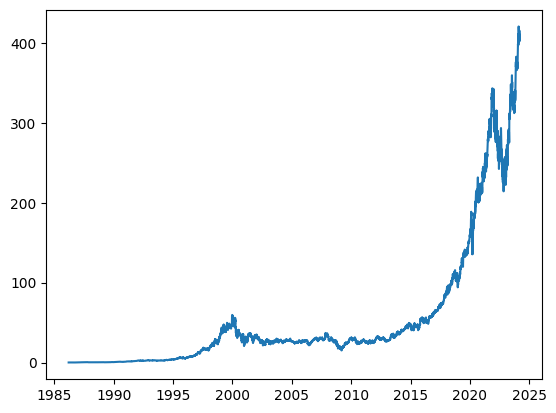

In [286]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [287]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-03-13',
                                '2024-03-08',
                                n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2023-03-13,253.699997,252.320007,248.589996,253.919998
1,2023-03-14,252.320007,248.589996,253.919998,260.790009
2,2023-03-15,248.589996,253.919998,260.790009,265.440002
3,2023-03-16,253.919998,260.790009,265.440002,276.200012
4,2023-03-17,260.790009,265.440002,276.200012,279.429993
...,...,...,...,...,...
245,2024-03-04,407.720001,413.640015,415.500000,414.920013
246,2024-03-05,413.640015,415.500000,414.920013,402.649994
247,2024-03-06,415.500000,414.920013,402.649994,402.089996
248,2024-03-07,414.920013,402.649994,402.089996,409.140015


In [288]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((250,), (250, 3, 1), (250,))

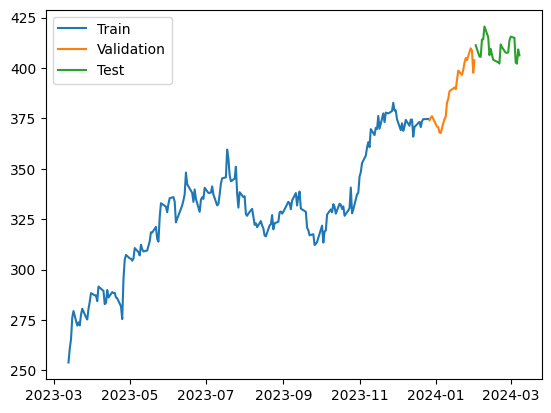

In [289]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


In [290]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 4s 125ms/step - loss: 108435.1719 - mean_absolute_error: 328.0815 - val_loss: 150629.4375 - val_mean_absolute_error: 387.8727
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 108235.0781 - mean_absolute_error: 327.7788 - val_loss: 150400.7969 - val_mean_absolute_error: 387.5779
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 108039.2422 - mean_absolute_error: 327.4795 - val_loss: 150152.2500 - val_mean_absolute_error: 387.2571
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 107795.3906 - mean_absolute_error: 327.1070 - val_loss: 149790.0938 - val_mean_absolute_error: 386.7892
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 107458.3203 - mean_absolute_error: 326.5912 - val_loss: 149338.4375 - val_mean_absolute_error: 386.2050
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 107061.8984 - mean_absolute_error: 325.9825 - val_

7/7 [==============================] - 0s 3ms/step


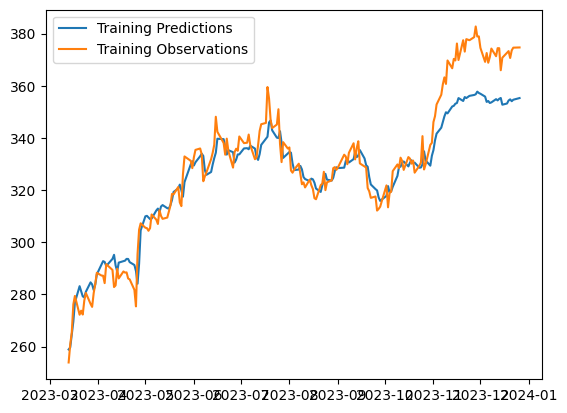

In [291]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])


1/1 [==============================] - 0s 20ms/step


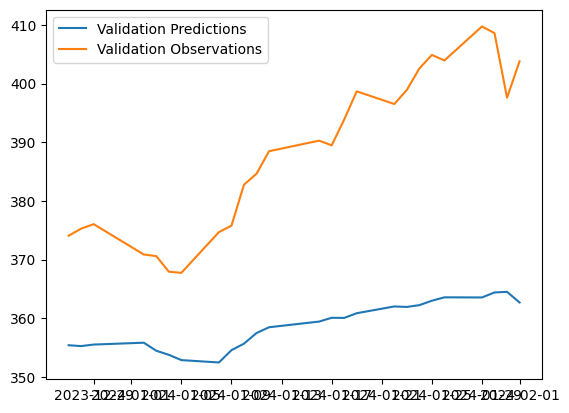

In [292]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])


1/1 [==============================] - 0s 20ms/step


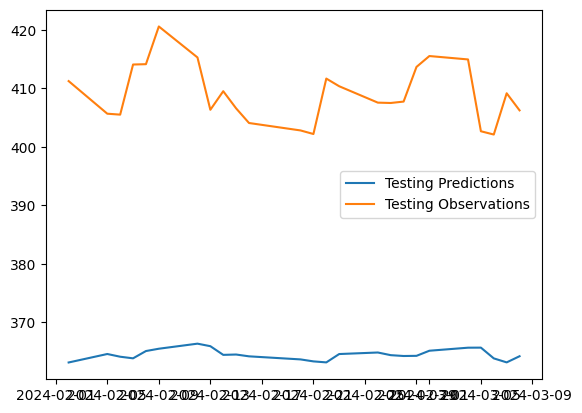

In [293]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])


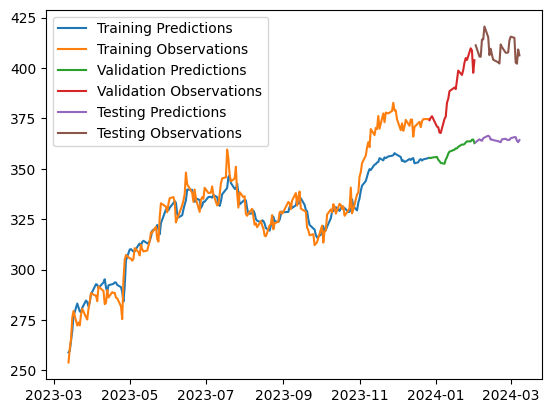

In [294]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])


In [295]:
recursive_predictions = []
recursive_dates = dates_test[-14:]
last_window  = X_test[-14]

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    new_window = list(last_window[1:])
    new_window.append(next_prediction)
    new_window = np.array(new_window)
    last_window = new_window

1/1 [==============================] - 0s 33ms/step


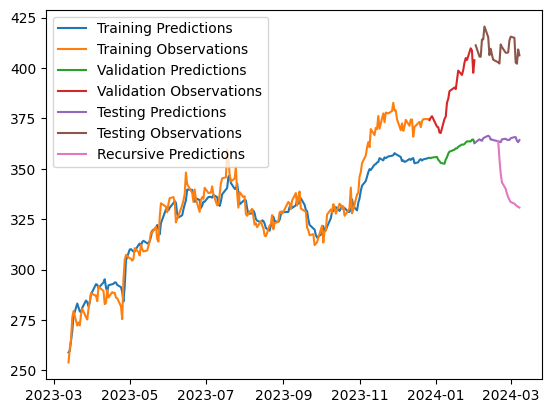

In [296]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
